In [1]:
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
import squarify
from functools import reduce

In [169]:
len(df.columns)

106

In [170]:
# loading the json file
with open('7567.json',encoding='UTF-8') as data_file:    
    data = json.load(data_file)

In [3]:
df = json_normalize(data, sep = "_")
# ozil_pass = df[(df['type_name'] == "Pass") & (df['player_name']=='Mesut Özil')] # get passing information of Ozil
# pass_column = [i for i in df.columns if i.startswith("pass")]
# ozil_pass = ozil_pass[["id", "period", "timestamp", "location", "pass_end_location", "pass_recipient_name"]]
# ozil_pass.head()

C:\Users\Aman\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [4]:
bins = [x for x in range(-180,180,15)]
labels = [x for x in range(-165,180,15)]
df['pass_angle_degree'] = df['pass_angle'].map(lambda x: np.degrees(x))
df['binned_pass_angle'] = pd.cut(df['pass_angle_degree'], bins=bins, labels=labels)
pass_length_bins = [0,10,20,30,40,50]
pass_length_labels = ["very_short","short","medium","long","very_long"]
df['binned_pass_length'] = pd.cut(df['pass_length'], bins=pass_length_bins, labels=pass_length_labels)

In [90]:
positions = {}
for x  in df.tactics_lineup[0]:
    positions[x['player']['name']] = x['position']['name']

In [5]:
def player_pass_df(df,name):
    df = df[(df['type_name'] == "Pass") & (df['player_name']==name)]
    df = df[[
    'position_name',
    'pass_recipient_id',
    'pass_recipient_name',
    'pass_length',
    'pass_angle',
    'pass_height_id',
    'pass_height_name',
    'pass_end_location',
    'pass_body_part_id',
    'pass_body_part_name',
    'pass_type_id',
    'pass_type_name',
    'pass_angle_degree',
    'binned_pass_angle',
    'binned_pass_length'
    ]]
    grouped = df.groupby('binned_pass_angle')
    data_new = pd.DataFrame(columns=["Angle","Length","Frequency"])
    for name,group in grouped:
        angle = name
        frequency = group['pass_length'].count()
        length = group['pass_length'].mean()
        data_new = data_new.append({"Angle":angle,"Length":length,"Frequency":frequency}, ignore_index=True)
    pass_length_bins = [0,10,20,30,40,100]
    pass_length_labels = ["very_short","short","medium","long","very_long"]
    data_new['binned_pass_length'] = pd.cut(data_new['Length'], bins=pass_length_bins, labels=pass_length_labels)
    data_new['binned_pass_length'] = data_new['binned_pass_length'].cat.add_categories('No Pass')
    data_new['binned_pass_length'].fillna('No Pass',inplace=True)
    return data_new
    

In [6]:
positions = {'Jonas Hector': 'Left Back',
 'Joshua Kimmich': 'Right Back',
 'Leon Goretzka': 'Right Wing',
 'Manuel Neuer': 'Goalkeeper',
 'Marco Reus': 'Left Wing',
 'Mats Hummels': 'Left Center Back',
 'Mesut Özil': 'Center Attacking Midfield',
 'Niklas Süle': 'Right Center Back',
 'Sami Khedira': 'Right Center Midfield',
 'Timo Werner': 'Center Forward',
 'Toni Kroos': 'Left Center Midfield'}

In [167]:
import plotly.express as px
from plotly.graph_objs import *
def plot_wagon(pass_df):

    fig1 = px.bar_polar(pass_df, r="Frequency", theta="Angle",color= 'binned_pass_length',    color_discrete_map={
                "medium": "rgb(252, 123, 3)",
                "long": "rgb(252, 70, 3)",
                "very_long": "rgb(252, 3, 3)",
                "short": "rgb(252, 177, 3)",
                "very_short": "rgb(252, 219, 3)"
            },
                      )
    fig1.update_layout(showlegend=False,
    template=None,
    polar = dict(
        radialaxis = dict(color='rgba(0,0,0,0)',gridcolor = 'rgba(0,0,0,0)',linecolor='rgba(0,0,0,0)'),
        angularaxis = dict(color='rgba(0,0,0,0)',gridcolor = 'rgba(0,0,0,0)',linecolor='rgba(0,0,0,0)'),
        bgcolor='rgba(0,0,0,0)'
        ),
    paper_bgcolor='rgba(0,0,0,0)',
        autosize=False

                     )

    fig1.show()
    fig_dic = fig1.to_dict()
    for x in fig_dic['data']:
        x['legendgroup'] ="B"
    return fig_dic
    


In [91]:
positions

{'Chul Hong': 'Left Back',
 'Heung-Min Son': 'Right Center Forward',
 'Hyun-Soo Jang': 'Right Center Midfield',
 'Hyun-Woo Cho': 'Goalkeeper',
 'Ja-Cheol Koo': 'Left Center Forward',
 'Jae-Sung Lee': 'Right Midfield',
 'Seon-Min Moon': 'Left Midfield',
 'Woo-Young Jung': 'Left Center Midfield',
 'Yong Lee': 'Right Back',
 'Young-Gwon Kim': 'Left Center Back',
 'Young-Sun Yun': 'Right Center Back'}

In [110]:
def code_position(pos,length):
    rows = []
    cols = []
    if pos == 'Left Back':
        row =4
        col = 1
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
            
 
    if pos == 'Right Back':
        row = 4
        col = 5
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos == 'Right Wing' or pos == 'Right Center Forward':
        row =2
        col = 4
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos == 'Goalkeeper':
        row =  5
        col = 3
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos =='Left Wing' or pos == 'Left Center Forward':
        row = 2
        col = 2
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos =='Left Center Back':
        row= 4
        col = 2
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos =='Center Attacking Midfield':
        row = 3
        col = 3
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos =='Right Center Back':
        row = 4
        col = 4
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos == 'Right Center Midfield':
        row = 3
        col = 4
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos == 'Right Midfield':
        row = 3
        col = 5
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos == 'Center Forward':
        row = 2
        col = 3
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]        
    if pos == 'Left Center Midfield':
        row = 3
        col = 2
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    if pos == 'Left Midfield':
        row = 3
        col = 1
        rows = [row for x in range(length)]
        cols = [col for X in range(length)]
    return rows,cols

In [168]:
wagon_plots = {}
for player in positions.keys():
    print(player)
    pass_df = player_pass_df(df,player)
    wagon_plots[player] =  plot_wagon(pass_df)

Hyun-Woo Cho


Yong Lee


Young-Sun Yun


Young-Gwon Kim


Chul Hong


Jae-Sung Lee


Hyun-Soo Jang


Woo-Young Jung


Seon-Min Moon


Heung-Min Son


Ja-Cheol Koo


In [112]:

import matplotlib.pyplot as plt
import plotly.tools as tls

def draw_pitch(pitch, line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if orientation.lower().startswith("h"):
        
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.xlim(49,105)
            plt.ylim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.xlim(-1,105)
            plt.ylim(-1,69)
        ax.axis('off') # this hides the x and y ticks
    
        # side and goal lines #
        ly1 = [0,0,68,68,0]
        lx1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        ly2 = [13.84,13.84,54.16,54.16] 
        lx2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        ly3 = [13.84,13.84,54.16,54.16] 
        lx3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        ly4 = [30.34,30.34,37.66,37.66]
        lx4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        ly5 = [30.34,30.34,37.66,37.66]
        lx5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        ly6 = [24.84,24.84,43.16,43.16]
        lx6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        ly7 = [24.84,24.84,43.16,43.16]
        lx7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        ly8 = [0,68] 
        lx8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(93,34,color=line,zorder=5)
        plt.scatter(11,34,color=line,zorder=5)
        plt.scatter(52,34,color=line,zorder=5)

        circle1 = plt.Circle((93.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((10.5,34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((52, 34), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)

        ## Rectangles in boxes
        rec1 = plt.Rectangle((87.5,20), 16,30,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((0, 20), 16.5,30,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 106,70,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
        
    else:
        if view.lower().startswith("h"):
            fig,ax = plt.subplots(figsize=(10.4,6.8))
            plt.ylim(49,105)
            plt.xlim(-1,69)
        else:
            fig,ax = plt.subplots(figsize=(6.8,10.4))
            plt.ylim(-1,105)
            plt.xlim(-1,69)
        ax.axis('off') # this hides the x and y ticks

        # side and goal lines #
        lx1 = [0,0,68,68,0]
        ly1 = [0,104,104,0,0]

        plt.plot(lx1,ly1,color=line,zorder=5)


        # boxes, 6 yard box and goals

            #outer boxes#
        lx2 = [13.84,13.84,54.16,54.16] 
        ly2 = [104,87.5,87.5,104]
        plt.plot(lx2,ly2,color=line,zorder=5)

        lx3 = [13.84,13.84,54.16,54.16] 
        ly3 = [0,16.5,16.5,0]
        plt.plot(lx3,ly3,color=line,zorder=5)

            #goals#
        lx4 = [30.34,30.34,37.66,37.66]
        ly4 = [104,104.2,104.2,104]
        plt.plot(lx4,ly4,color=line,zorder=5)

        lx5 = [30.34,30.34,37.66,37.66]
        ly5 = [0,-0.2,-0.2,0]
        plt.plot(lx5,ly5,color=line,zorder=5)


           #6 yard boxes#
        lx6 = [24.84,24.84,43.16,43.16]
        ly6 = [104,99.5,99.5,104]
        plt.plot(lx6,ly6,color=line,zorder=5)

        lx7 = [24.84,24.84,43.16,43.16]
        ly7 = [0,4.5,4.5,0]
        plt.plot(lx7,ly7,color=line,zorder=5)

        #Halfway line, penalty spots, and kickoff spot
        lx8 = [0,68] 
        ly8 = [52,52]
        plt.plot(lx8,ly8,color=line,zorder=5)


        plt.scatter(34,93,color=line,zorder=5)
        plt.scatter(34,11,color=line,zorder=5)
        plt.scatter(34,52,color=line,zorder=5)

        circle1 = plt.Circle((34,93.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle2 = plt.Circle((34,10.5), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=1,alpha=1)
        circle3 = plt.Circle((34,52), 9.15,ls='solid',lw=1.5,color=line, fill=False, zorder=2,alpha=1)


        ## Rectangles in boxes
        rec1 = plt.Rectangle((20, 87.5), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)
        rec2 = plt.Rectangle((20, 0), 30,16.5,ls='-',color=pitch, zorder=1,alpha=1)

        ## Pitch rectangle
        rec3 = plt.Rectangle((-1, -1), 70,106,ls='-',color=pitch, zorder=1,alpha=1)

        ax.add_artist(rec3)
        ax.add_artist(circle1)
        ax.add_artist(circle2)
        ax.add_artist(rec1)
        ax.add_artist(rec2)
        ax.add_artist(circle3)
#         im = OffsetImage(img)
#         im.image.axes = ax
#         xy = (0,100)
#         ab = AnnotationBbox(im, xy)
#         ax.add_artist(ab)
        tls.mpl_to_plotly(fig)
        return fig
       

In [132]:
wagon_plots['Chul Hong']

{'data': [{'hoverlabel': {'namelength': 0},
   'hovertemplate': 'binned_pass_length=No Pass<br>Frequency=%{r}<br>Angle=%{theta}',
   'legendgroup': 'B',
   'marker': {'color': '#19d3f3'},
   'name': 'binned_pass_length=No Pass',
   'r': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]),
   'showlegend': True,
   'subplot': 'polar',
   'theta': array([-165., -150., -135., -120., -105.,  -90.,  -75.,  -30.,  165.]),
   'type': 'barpolar'},
  {'hoverlabel': {'namelength': 0},
   'hovertemplate': 'binned_pass_length=very_short<br>Frequency=%{r}<br>Angle=%{theta}',
   'legendgroup': 'B',
   'marker': {'color': 'rgb(252, 219, 3)'},
   'name': 'binned_pass_length=very_short',
   'r': array([1.]),
   'showlegend': True,
   'subplot': 'polar',
   'theta': array([-60.]),
   'type': 'barpolar'},
  {'hoverlabel': {'namelength': 0},
   'hovertemplate': 'binned_pass_length=medium<br>Frequency=%{r}<br>Angle=%{theta}',
   'legendgroup': 'B',
   'marker': {'color': 'rgb(252, 123, 3)'},
   'name': 'binned_pas

In [113]:
fig = draw_pitch("#195905","#faf0e6","vertical","full")

In [114]:
fig = tls.mpl_to_plotly(fig)

In [115]:
fig.update_layout(paper_bgcolor='green',plot_bgcolor="green")
dic = fig.to_dict()

In [116]:
specs = {"type": "barpolar"}
specs_array = []
arr = []
for i in range(5):
    for j in range(5):        
        arr.append(specs)
    specs_array.append(arr)
    arr= []
    

In [117]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig2 = make_subplots(rows=5, cols=5,specs=specs_array,subplot_titles=(  '','','','','',     '','Left Wing', 'Center Forward', 'Right Wing','',    '', 'Left Center Midfield', 'Center Attacking Midfield','Right Center Midfield', '','Left Back', 'Left Center Back' ,'','Right Center Back', 'Right Back' ,'','','Goalkeeper','',''),
                     vertical_spacing= 0.01
        
                    
                    )

In [154]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig2 = make_subplots(rows=5, cols=5,specs=specs_array,subplot_titles=(  '','','','','',     '','Left Center Forward', '', 'Right Center Forward','',    'Left Midfield', 'Left Center Midfield', '','Right Center Midfield', 'Right Midfield','Left Back', 'Left Center Back' ,'','Right Center Back', 'Right Back' ,'','','Goalkeeper','',''),
                     vertical_spacing= 0.01
        
                    
                    )

In [155]:
fig2

In [156]:
for player in positions.keys():
    plot = wagon_plots[player]
    rows,cols = code_position(positions[player],len(plot['data']))
    print(positions[player])
    fig2.add_traces(plot['data'],rows=rows,cols=cols)
    fig2.update_polars(
        radialaxis = dict(color='rgba(0,0,0,0)',gridcolor = 'rgba(0,0,0,0)',linecolor='rgba(0,0,0,0)',visible=False),
        angularaxis = dict(color='rgba(0,0,0,0)',gridcolor = 'rgba(0,0,0,0)',linecolor='rgba(0,0,0,0)',visible = False,rotation = 90,direction= 'clockwise'),
        bgcolor='rgba(0,0,0,0)'
        )
    fig2.update_layout(showlegend=True,width=1600,height=1800)
    

Goalkeeper
Right Back
Right Center Back
Left Center Back
Left Back
Right Midfield
Right Center Midfield
Left Center Midfield
Left Midfield
Right Center Forward
Left Center Forward


In [157]:
position_inverted = {y:x for x,y in positions.items()}

In [158]:
for x in fig2.layout.annotations:
    if x.text in position_inverted.keys():
        x.text = position_inverted[x.text]

In [159]:
for x in fig2.layout.annotations:
    x.text = "<span style=\"  font-size: 20pt;font-family: 'Luckiest Guy';color: #fff;text-shadow:0px -3px 0 #212121,0px -3px 0 #212121,0px  3px 0 #212121,0px  3px 0 #212121,-3px  0px 0 #212121,  3px  0px 0 #212121,-3px  0px 0 #212121,3px  0px 0 #212121,-3px -3px 0 #212121,  3px -3px 0 #212121,-3px  3px 0 #212121,3px  3px 0 #212121,-3px  9px 0 #212121,0px  9px 0 #212121,3px  9px 0 #212121,0 9px 1px rgba(0,0,0,.1),0 0 3px rgba(0,0,0,.1),0 3px 1.5px rgba(0,0,0,.3),0 6px 3px rgba(0,0,0,.2),0 9px 9px rgba(0,0,0,.25),0 12px 12px rgba(0,0,0,.2),0 18px 18px rgba(0,0,0,.15);\">"+x.text+"</span>"

In [160]:
from PIL import Image

image = Image.open('pitch.jpeg')

# trace1= go.Scatter(x=[0,0.5,1,2,2.2],y=[1.23,2.5,0.42,3,1])
# layout= go.Layout(images= [dict(
#                   source= image,
#                   xref= "x",
#                   yref= "y",
#                   x= 0,
#                   y= 3,
#                   sizex= 2,
#                   sizey= 2,
#                   sizing= "stretch",
#                   opacity= 0.5,
#                   layer= "below")])
# fig=go.Figure(data=[trace1],layout=layout)
# fig.show()

In [161]:
fig2.layout.update(images= [dict(
                  source= image,
                  xref= "x",
                  yref= "y",
                  x= -1,
                  y= 4,
                  sizex= 7,
                  sizey= 5,
                  sizing= "stretch",
                  opacity= 1.0,
                  layer= "below")], xaxis = dict(showgrid= False,showline =False,zeroline= False),
                            yaxis = dict(showgrid = False,showline =False,zeroline = False),
                   annotations = dict(font="hgfyf")
                                    
                                         )

Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': ('<span style="  font-size: 20pt' ... '0,0,.15);">Ja-Cheol Koo</span>'),
                     'x': 0.292,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.798,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': ('<span style="  font-size: 20pt' ... ',0,.15);">Heung-Min Son</span>'),
                     'x': 0.708,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.798,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': ('<span style="  font-size: 20pt' ... ',0,.15);">Seo

In [162]:
name = []
for x in fig2.data:
    if x.name not in name and x.name != 'binned_pass_length=No Pass':
        name.append(x.name)
        x['showlegend'] = True
    else:
        x['showlegend'] = False

In [163]:
for x in fig2.data:
    if x.showlegend == True:
        x.name = "Pass Length:"+x.name.split("=")[1]

In [164]:
fig2.layout.update(legend=dict(
        x=0,
        y=1,
        traceorder='normal',
        font=dict(
            family='sans-serif',
            size=12,
            color='white'
        ),
        bgcolor='green',
        bordercolor='#FFFFFF',
        borderwidth=2
    ),title = dict(text="<span style=\"  font-size: 30pt;font-family: 'Arial';color: White;text-shadow:0px -3px 0 #212121,0px -3px 0 #212121,0px  3px 0 #212121,0px  3px 0 #212121,-3px  0px 0 #212121,  3px  0px 0 #212121,-3px  0px 0 #212121,3px  0px 0 #212121,-3px -3px 0 #212121,  3px -3px 0 #212121,-3px  3px 0 #212121,3px  3px 0 #212121,-3px  9px 0 #212121,0px  9px 0 #212121,3px  9px 0 #212121,0 9px 1px rgba(0,0,0,.1),0 0 3px rgba(0,0,0,.1),0 3px 1.5px rgba(0,0,0,.3),0 6px 3px rgba(0,0,0,.2),0 9px 9px rgba(0,0,0,.25),0 12px 12px rgba(0,0,0,.2),0 18px 18px rgba(0,0,0,.15);\">South Korea Pass Wagon</span>",
                  xref ="paper",x=0.5,y=0.90),
                  )

Layout({
    'annotations': [{'font': {'size': 16},
                     'showarrow': False,
                     'text': ('<span style="  font-size: 20pt' ... '0,0,.15);">Ja-Cheol Koo</span>'),
                     'x': 0.292,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.798,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': ('<span style="  font-size: 20pt' ... ',0,.15);">Heung-Min Son</span>'),
                     'x': 0.708,
                     'xanchor': 'center',
                     'xref': 'paper',
                     'y': 0.798,
                     'yanchor': 'bottom',
                     'yref': 'paper'},
                    {'font': {'size': 16},
                     'showarrow': False,
                     'text': ('<span style="  font-size: 20pt' ... ',0,.15);">Seo


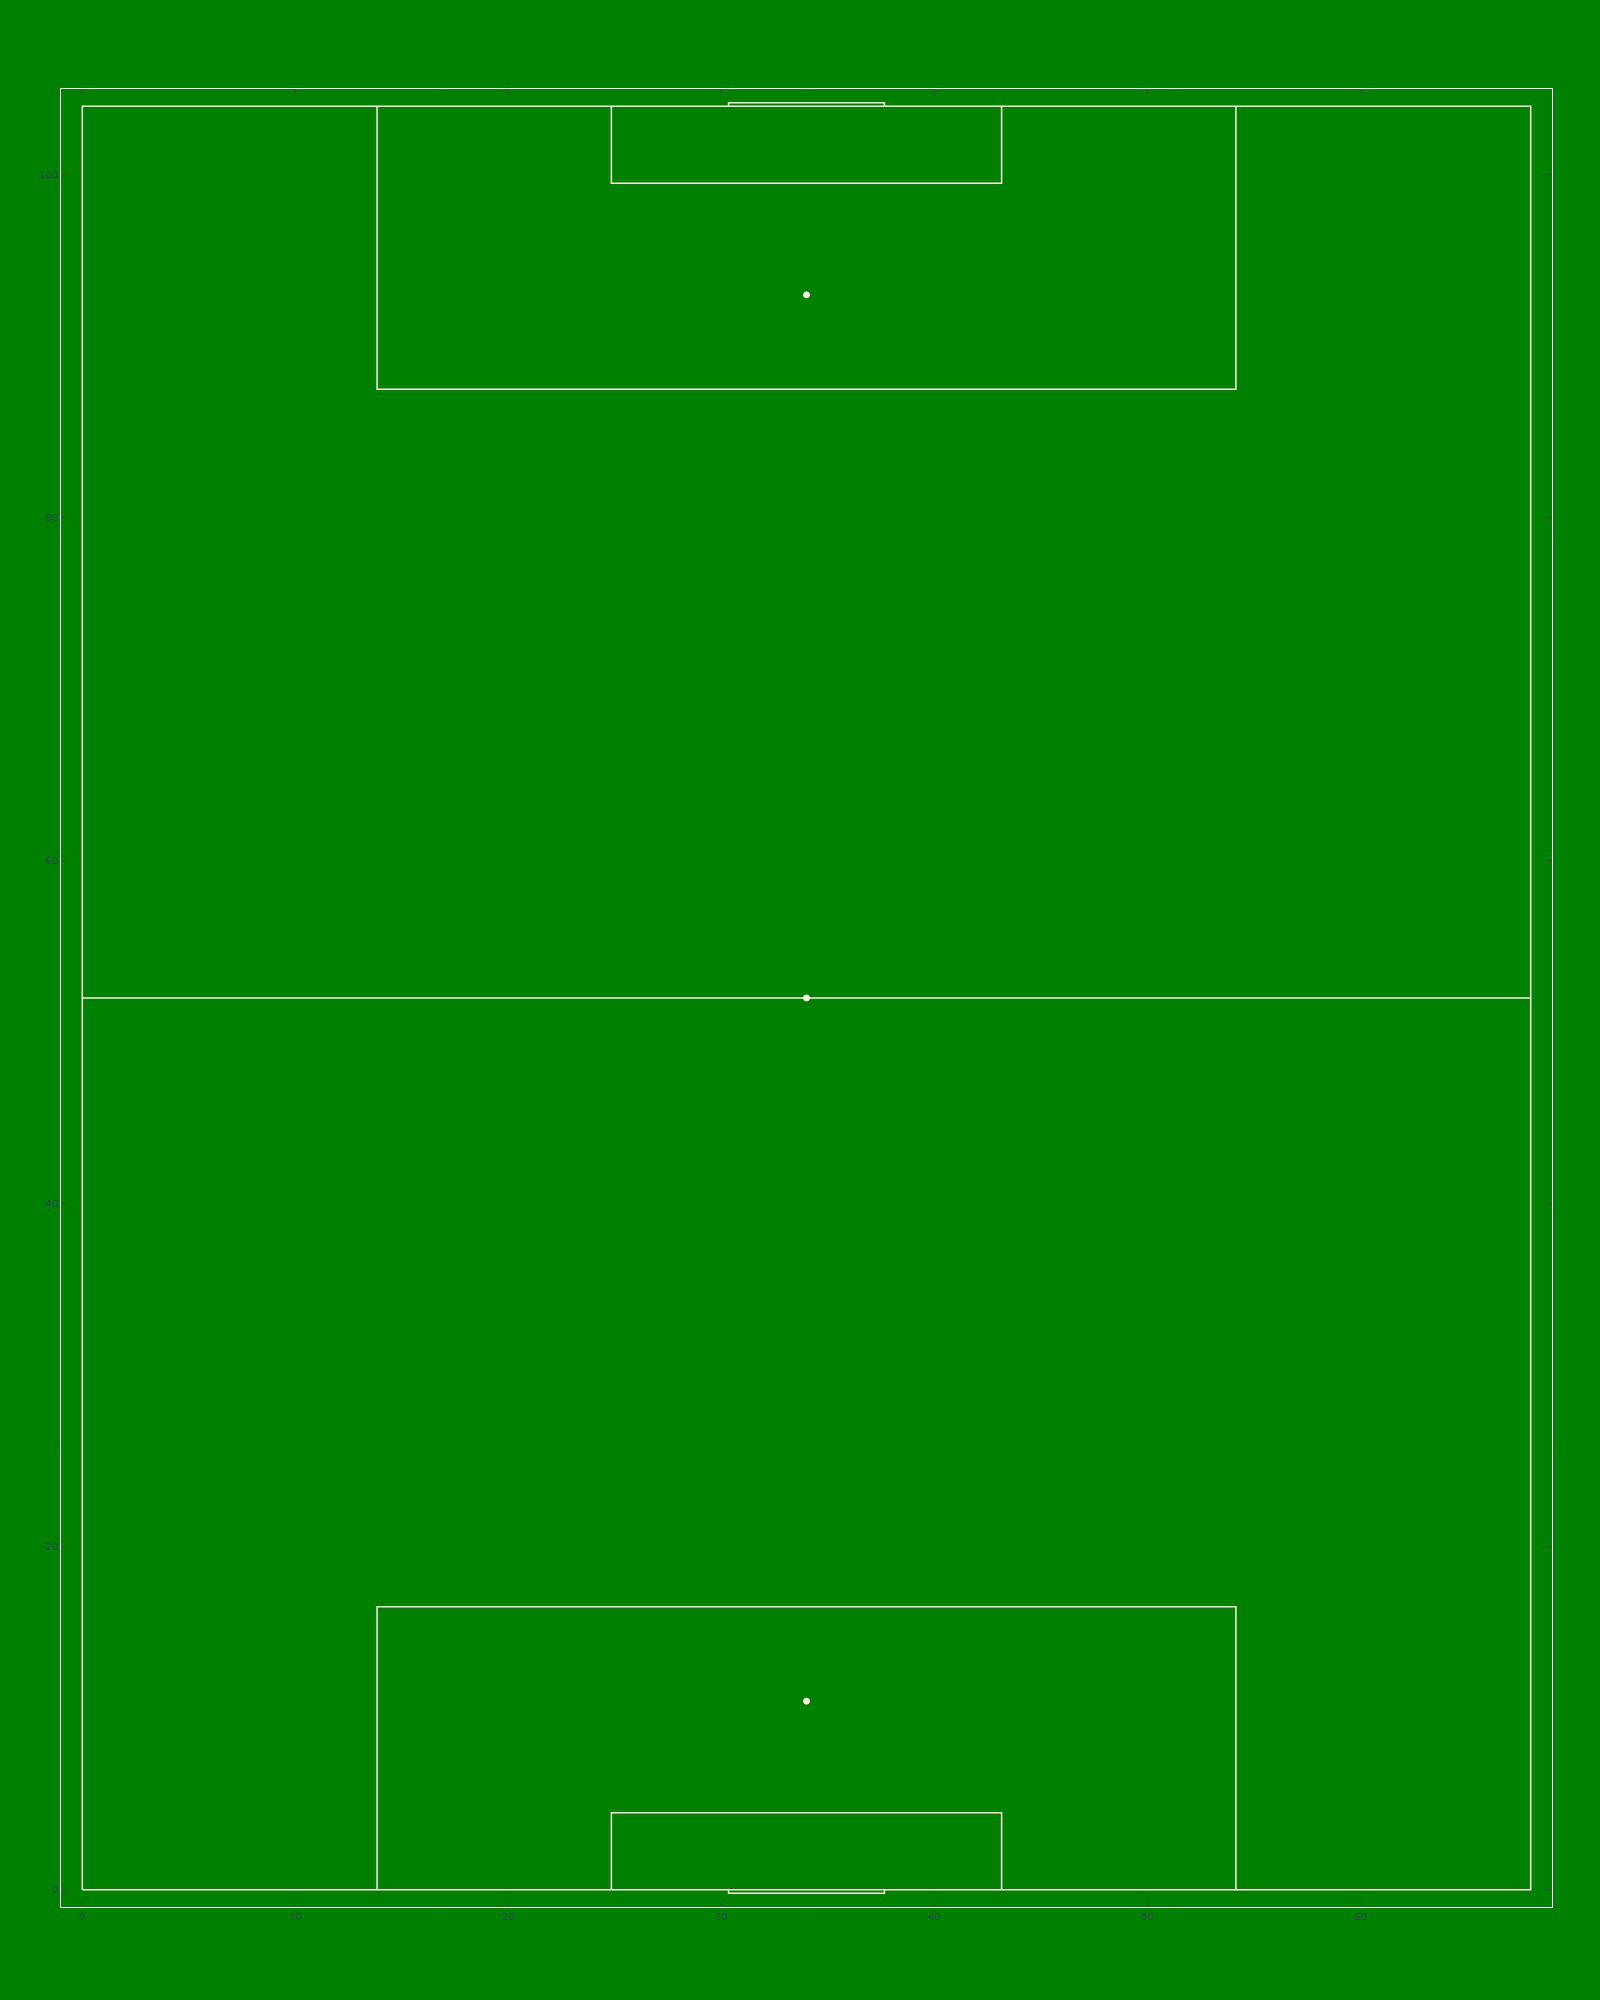

In [165]:
fig2

In [166]:
fig2.write_html('south_korea.html')